# 加载数据集
## 预置数据集

In [23]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# 从Pytorch预置的数据集下载 
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()  # 指定特征和标签互换
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()  # 指定特征和标签互换
)

In [24]:
# 实际上就是datasets下面的子类
print(type(test_data))

<class 'torchvision.datasets.mnist.FashionMNIST'>


也可以用下面这种方式，自定义图像数据集
`FaceDataset = datasets.ImageFolder('./data', transform=img_transform)`

## 自定义数据集
- `__init__`
- `__len__`
- `__getitem__`

In [31]:
import os
import pandas as pd
from torchvision.io import read_image
from PIL import Image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file) # 标签
        self.img_dir = img_dir # 图像
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

下面来看个示例，数据集结构如下：  
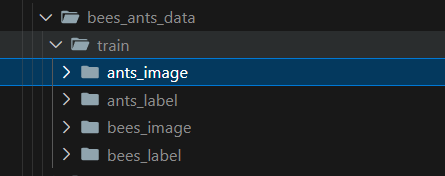  
那么如何定义一个数据集类来表示这个数据集呢？

In [32]:
class AntAndBeeData(Dataset):
  def __init__(self, root_dir, label_dir, transform=None, target_transform=None):
    self.root_dir = root_dir
    self.label_dir = label_dir
    self.path = os.path.join(self.root_dir, self.label_dir)
    self.img_path_list = os.listdir(self.path)
    self.transform = transform #图像转换
    self.target_transform = target_transform
  
  def __getitem__(self, index):
    img_name = self.img_path_list[index]
    img_item_path = os.path.join(self.path,img_name)
    img = Image.open(img_item_path)
    label = self.label_dir
    # 调用转换函数
    if self.transform:
      img = self.transform(img)
    if self.target_transform:
      label = self.target_transform(label)
    return img, label
  
  def __len__(self):
    return len(self.img_path_list)

In [33]:
trainAntsDataset = AntAndBeeData("data/hymenoptera_data/train","ants")
trainBeesDataset = AntAndBeeData("data/hymenoptera_data/train","bees")
trainDataset = trainAntsDataset + trainBeesDataset

label: ants


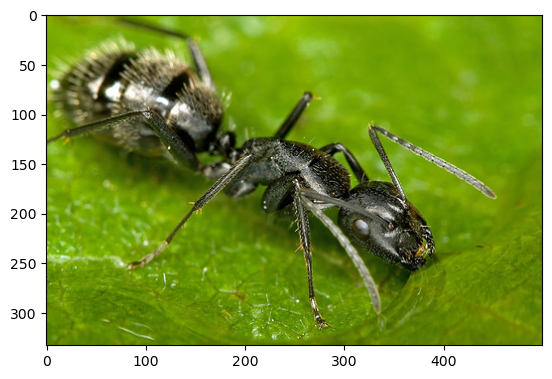

In [41]:
plt.imshow(trainDataset[1][0])
print(f"label: {trainDataset[1][1]}")

# 迭代可视化数据集

## 不用dataloader，直接索引

In [9]:
sample_idx = torch.randint(len(training_data), size=(1,)).item()
print(sample_idx)

20336


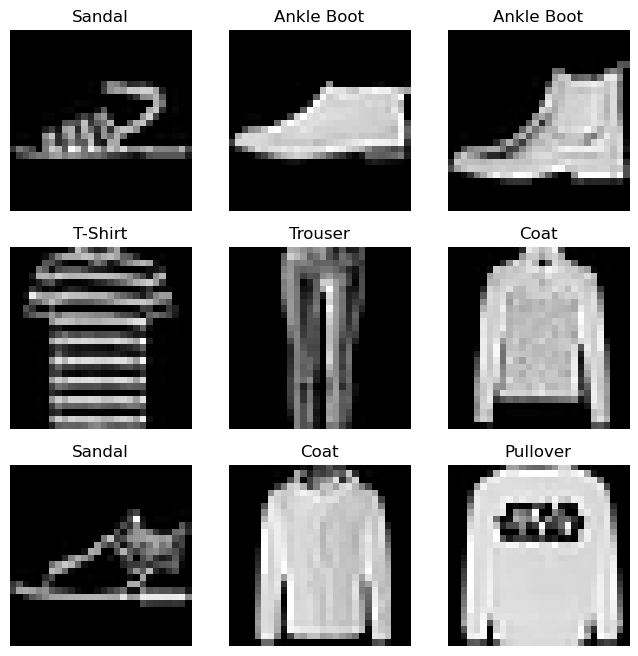

In [11]:
# 与列表使用方法雷系来迭代可视化数据
labels_map = {
  0: "T-Shirt",
  1: "Trouser",
  2: "Pullover",
  3: "Dress",
  4: "Coat",
  5: "Sandal",
  6: "Shirt",
  7: "Sneaker",
  8: "Bag",
  9: "Ankle Boot",
}
figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
  # 获取一个随机索引,范围是len(training_data)，形状为(1,), item使之从tensor转化为int
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  # 直接索引获取数据
  img , label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  # img.squeeze()将多维tensor转化为一维，比如(1,28,28)→(28,28)
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

这种单索引虽然也挺方便，但我们训练显然不是一个个样本训练的，而是每次一个batch，这就需要使用DataLoader
## 使用DataLoader

In [12]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


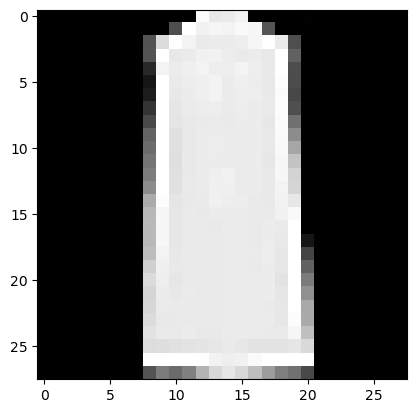

label: 6 Shirt


In [16]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="grey")
plt.show()
print(f"label: {label} {labels_map[int(label)]}")